In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\User\Desktop\Final_project\AgroFoodEnhancedClimateDataCorrected.csv"
df = pd.read_csv(file_path)

# Ensure the date column is parsed as a datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Adjust 'date' if the column name differs

# Define parameters to calculate mean values for
parameters = [
    'temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 'humidity', 
    'visibility_km', 'air_quality_PM2.5', 'air_quality_PM10', 
    'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'air_quality_Carbon_Monoxide',  
    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
    'wind_degree', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_kph'
]

# Filter for July (month 7) and only the first week
df_july = df[(df['date'].dt.month == 7) & (df['date'].dt.day <= 7)]
# Group by 'location_name' and calculate mean for each parameter for July
mean_values_july = df_july.groupby('location_name')[parameters].mean().reset_index()
# Round values to 3 decimal places
mean_values_july = mean_values_july.round(3)
# Save to CSV
output_path_july = 'MeanValues_July.csv'
mean_values_july.to_csv(output_path_july, index=False)

# Filter for September (month 9) and only the first week
df_september = df[(df['date'].dt.month == 9) & (df['date'].dt.day <= 7)]
# Group by 'location_name' and calculate mean for each parameter for September
mean_values_september = df_september.groupby('location_name')[parameters].mean().reset_index()
# Round values to 3 decimal places
mean_values_september = mean_values_september.round(3)
# Save to CSV
output_path_september = 'MeanValues_September.csv'
mean_values_september.to_csv(output_path_september, index=False)

print(f"Mean values for July saved to {output_path_july}")
print(f"Mean values for September saved to {output_path_september}")


Mean values for July saved to MeanValues_July.csv
Mean values for September saved to MeanValues_September.csv


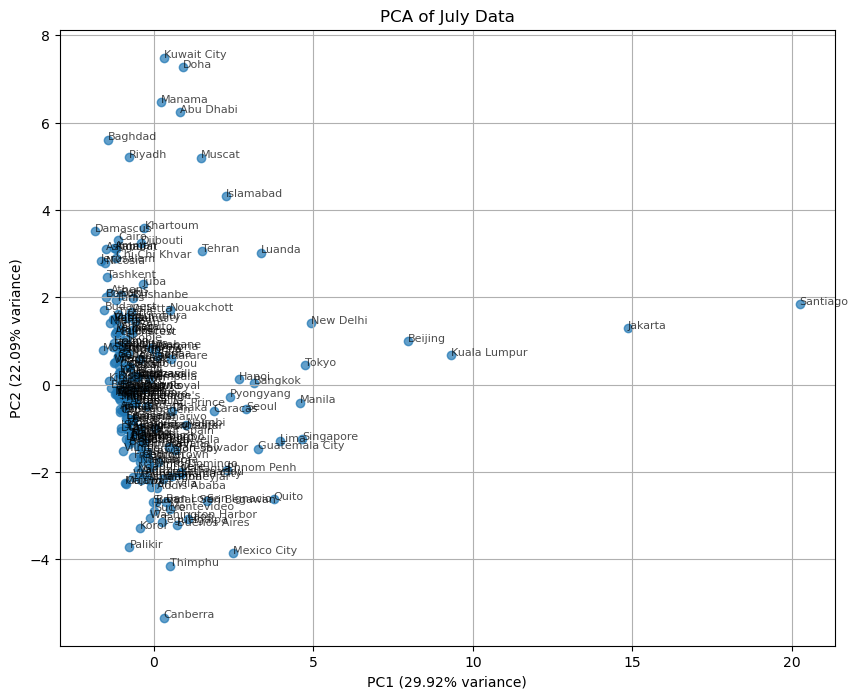

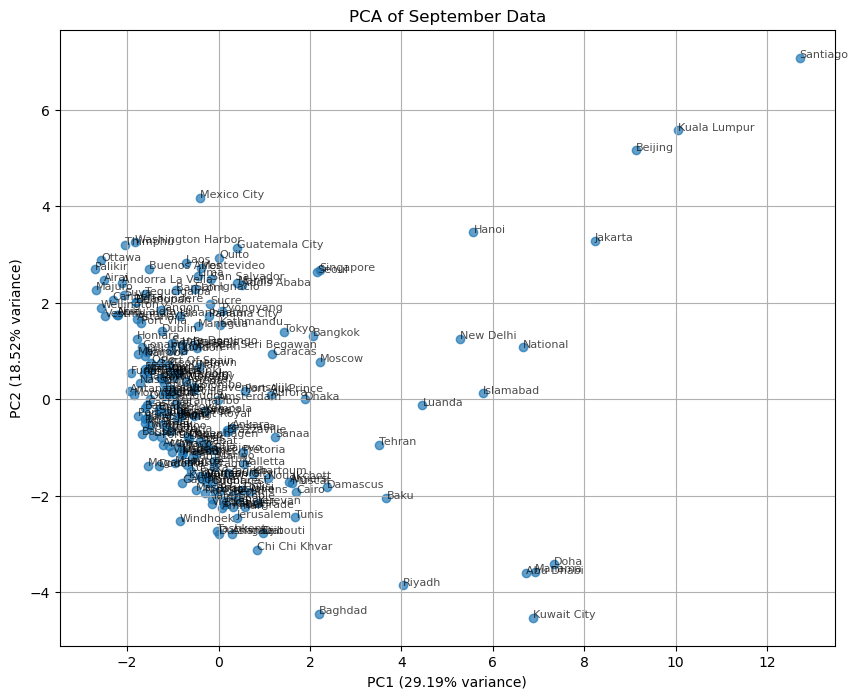

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the datasets
july_data_path = r"C:\Users\User\Desktop\Final_project\MeanValues_July.csv"
september_data_path = r"C:\Users\User\Desktop\Final_project\MeanValues_September.csv"
july_df = pd.read_csv(july_data_path)
september_df = pd.read_csv(september_data_path)

# Define the parameters for PCA
parameters = [
    'temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 'humidity', 
    'visibility_km', 'air_quality_PM2.5', 'air_quality_PM10', 
    'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'air_quality_Carbon_Monoxide',  
    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide', 
    'wind_degree', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_kph'
]

# Function to apply PCA and plot the results
def plot_pca(df, parameters, title):
    # Select only the parameters for PCA
    df_numeric = df[parameters]
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_numeric)
    
    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    # Plot the PCA result
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
    
    # Annotate points with location names
    for i, location in enumerate(df['location_name']):
        plt.annotate(location, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.7)
    
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
    plt.title(f"PCA of {title}")
    plt.grid()
    plt.show()

# Plot PCA for July and September datasets
plot_pca(july_df, parameters, "July Data")
plot_pca(september_df, parameters, "September Data")


clusstering by data

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

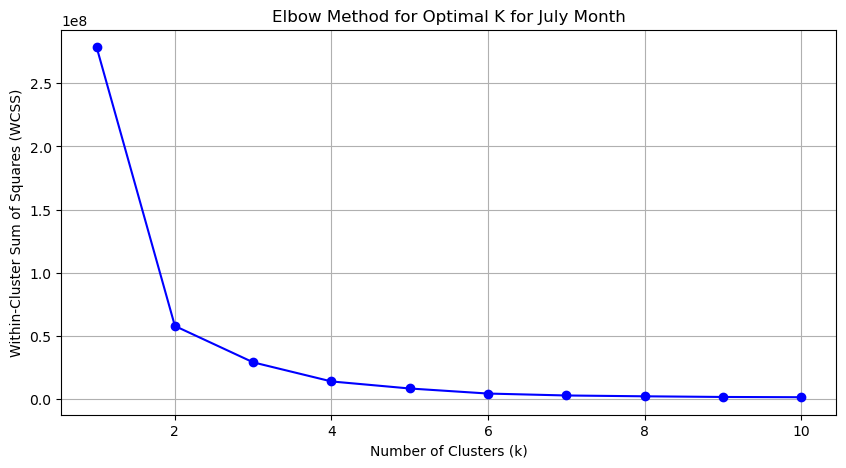

In [3]:
import numpy as np
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Preparation
# Assume data is loaded and standardized as 'data'
july_data_path = r"C:\Users\User\Desktop\Final_project\MeanValues_July.csv"
data1 = pd.read_csv(july_data_path)

# Selecting relevant columns from the data
data = data1[['temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 
               'humidity', 'visibility_km', 'air_quality_PM2.5', 'air_quality_PM10', 
               'air_quality_us-epa-index', 'air_quality_gb-defra-index', 
               'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
               'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
               'wind_degree', 'cloud', 'feels_like_celsius', 'uv_index', 
               'gust_kph']]

# Elbow Method
wcss = []  # List for Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Visualizing the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K for July Month')
plt.grid()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

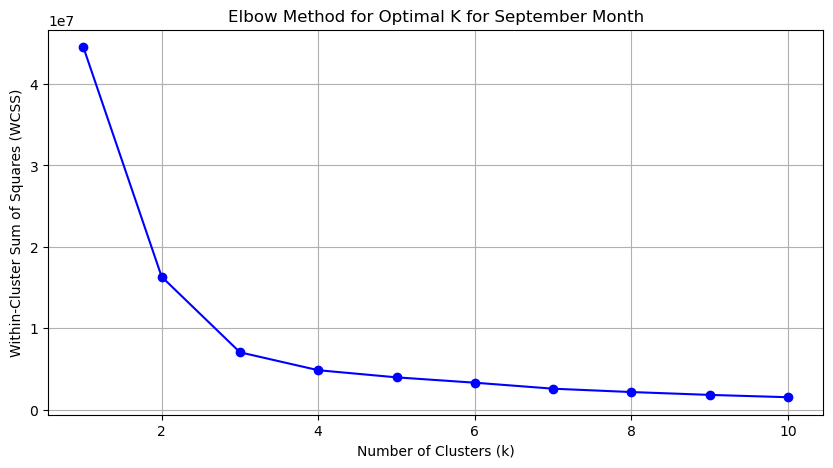

In [4]:
import numpy as np
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Preparation
# Assume data is loaded and standardized as 'data'
july_data_path = r"C:\Users\User\Desktop\Final_project\MeanValues_September.csv"
data1 = pd.read_csv(july_data_path)

# Selecting relevant columns from the data
data = data1[['temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 
               'humidity', 'visibility_km', 'air_quality_PM2.5', 'air_quality_PM10', 
               'air_quality_us-epa-index', 'air_quality_gb-defra-index', 
               'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
               'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
               'wind_degree', 'cloud', 'feels_like_celsius', 'uv_index', 
               'gust_kph']]

# Elbow Method
wcss = []  # List for Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Visualizing the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K for September Month')
plt.grid()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

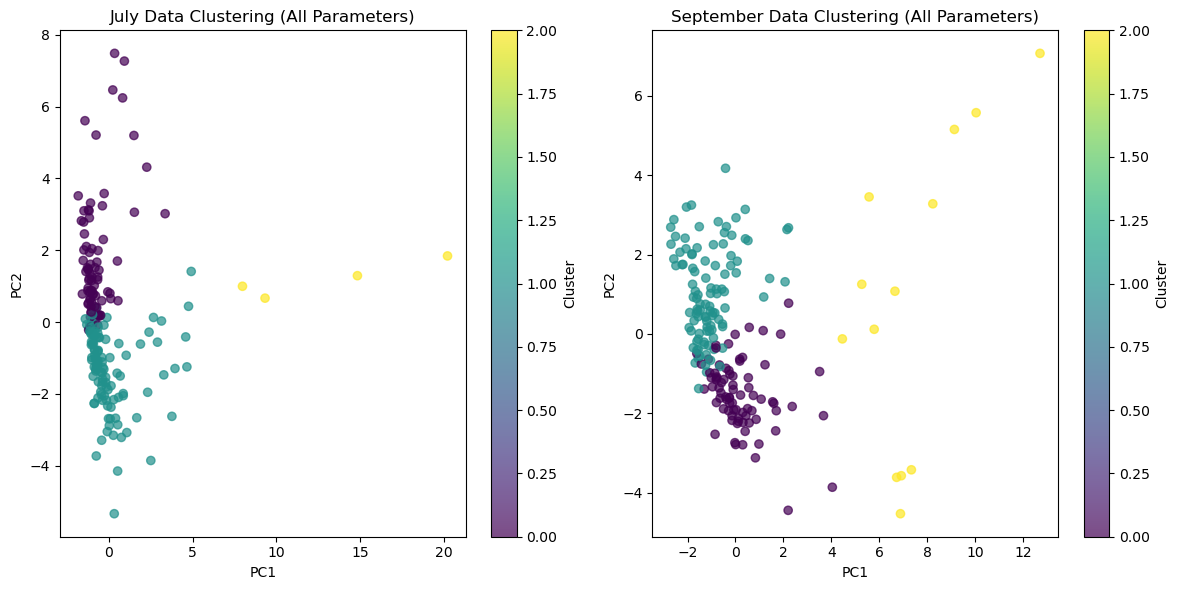

July Data Clusters (Expanded):
    location_name  Cluster
0          Lusaka        0
1         Mbabane        0
2          Maseru        0
3          Maputo        0
4          Manama        0
..            ...      ...
191        Majuro        1
192      Santiago        2
193  Kuala Lumpur        2
194       Beijing        2
195       Jakarta        2

[196 rows x 2 columns]

September Data Clusters (Expanded):
    location_name  Cluster
0          Zagreb        0
1       Podgorica        0
2        Dushanbe        0
3           Sanaa        0
4          Dodoma        0
..            ...      ...
190          Doha        2
191      Santiago        2
192     New Delhi        2
193        Manama        2
194      National        2

[195 rows x 2 columns]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction

# Load the datasets
july_data_path = r"C:\Users\User\Desktop\Final_project\MeanValues_July.csv"
september_data_path = r"C:\Users\User\Desktop\Final_project\MeanValues_September.csv"
july_data = pd.read_csv(july_data_path)
september_data = pd.read_csv(september_data_path)

# Define the parameters for clustering
parameters = [
    'temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 'humidity', 
    'visibility_km', 'air_quality_PM2.5', 'air_quality_PM10', 
    'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'air_quality_Carbon_Monoxide',  
    'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
    'wind_degree', 'cloud', 'feels_like_celsius', 'uv_index', 'gust_kph',
]

# Ensure 'location_name' is included in the dataset for both July and September
# If it's not in the CSV, you need to add it accordingly in your datasets.

# Standardize the datasets
scaler = StandardScaler()
july_scaled = scaler.fit_transform(july_data[parameters])
september_scaled = scaler.fit_transform(september_data[parameters])

# Perform KMeans clustering for July and September data
n_clusters = 3  # Example: 2 clusters for both datasets
kmeans_july = KMeans(n_clusters=n_clusters, random_state=0)
july_clusters = kmeans_july.fit_predict(july_scaled)

kmeans_september = KMeans(n_clusters=n_clusters, random_state=0)
september_clusters = kmeans_september.fit_predict(september_scaled)

# Add cluster labels back to the original data
july_data['Cluster'] = july_clusters
september_data['Cluster'] = september_clusters

# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
july_pca = pca.fit_transform(july_scaled)
september_pca = pca.fit_transform(september_scaled)

# Plot the clusters for July data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(july_pca[:, 0], july_pca[:, 1], c=july_clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('July Data Clustering (All Parameters)')
plt.colorbar(label='Cluster')

# Plot the clusters for September data
plt.subplot(1, 2, 2)
plt.scatter(september_pca[:, 0], september_pca[:, 1], c=september_clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('September Data Clustering (All Parameters)')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

# Expand clusters for July data
july_cluster_expanded = july_data[['location_name', 'Cluster']].sort_values(by='Cluster').reset_index(drop=True)
print("July Data Clusters (Expanded):")
print(july_cluster_expanded)
july_cluster_expanded.to_csv("july_cluster.csv")

# Expand clusters for September data
september_cluster_expanded = september_data[['location_name', 'Cluster']].sort_values(by='Cluster').reset_index(drop=True)
print("\nSeptember Data Clusters (Expanded):")
print(september_cluster_expanded)
september_cluster_expanded.to_csv("september_cluster.csv")


